In [90]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
#### script de descarga dataset#####
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets", filter="data")  # Compatible con Python 3.14
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [91]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [92]:
housing.shape

(20640, 10)

- Cada fila(**20640**) representa un distrito, hay 10 atributos

In [93]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- El atributo **total_bedrooms** solo tiene **20433 valores**
- Todos son numéricos a excepción de **ocean_proximity** es **object** (Categóricos)

**Descripción de datos categóricos**

In [94]:
housing["ocean_proximity"].unique() # Valores únicos de la columna "ocean_proximity"

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [95]:
housing["ocean_proximity"].value_counts() # cuantos hay de cada valor único

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Descripción general

In [96]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Histograma**

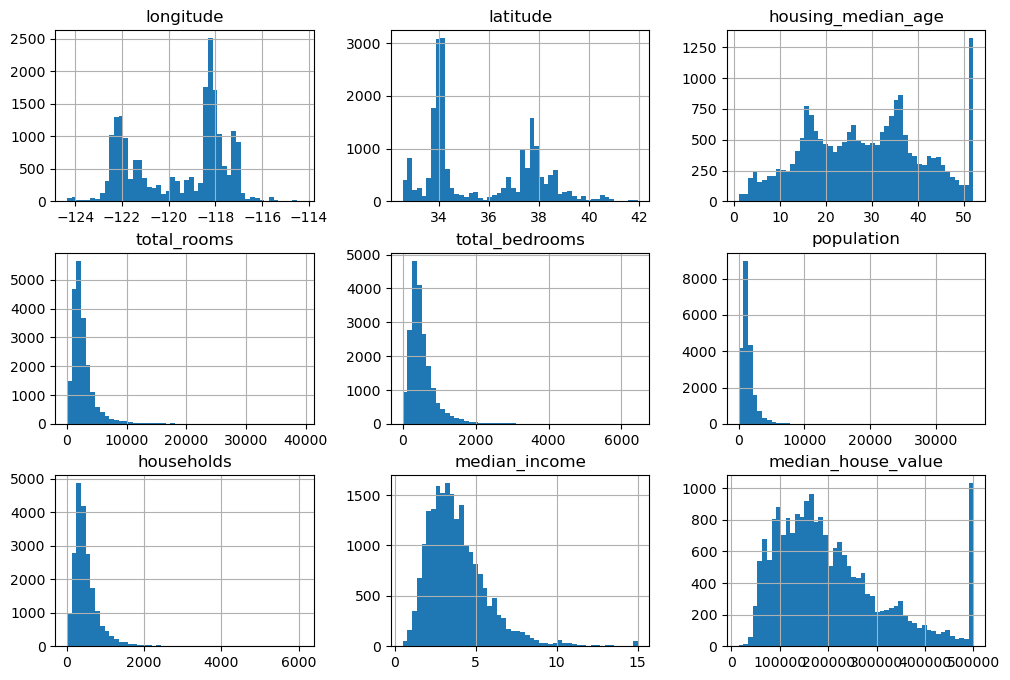

In [97]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8))
plt.show()

**Separación de train y test forma manual sin usar sklearn**

In [98]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] ## Devuelve train y test

In [99]:
train_set, test_set= shuffle_and_split_data(housing,0.2) # 80% train, 20% test

In [100]:
print(f"El tamaño de los datos de entrenamiento es. {len(train_set)}")
print(f"El tamaño de los datos de test es: {len(test_set)}")

El tamaño de los datos de entrenamiento es. 16512
El tamaño de los datos de test es: 4128


- Esta forma cambia de forma aleatoriamente los datos seleccionados para train y test <span style="background-color:yellow">**cada ves que se ejecuta.**</span>
- Es conveniente usar la librería de Scikit-learn

In [101]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

In [102]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [103]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN


In [104]:
print(f"El tamaño de los datos de entrenamiento es. {len(train_set)}")
print(f"El tamaño de los datos de test es: {len(test_set)}")

El tamaño de los datos de entrenamiento es. 16512
El tamaño de los datos de test es: 4128


**Usamos la `pd.cut()` para convertir el atrtibuto "income_cat" en categórico del 1 al 5. si nos piden estratificar**

In [105]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts().sort_index()

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

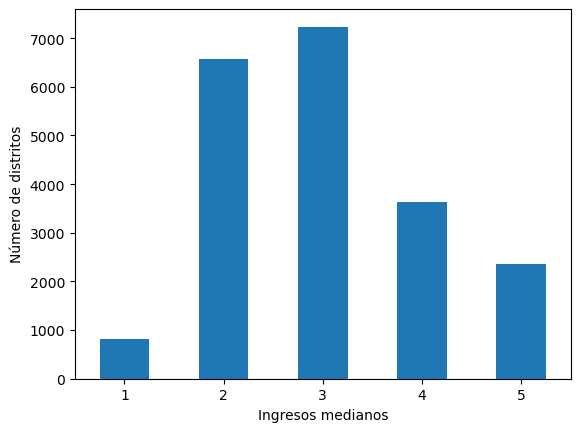

In [106]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0)
plt.xlabel("Ingresos medianos")
plt.ylabel("Número de distritos")
plt.show()

**Usando `StratifiedShuffleSplit`para estratificar, generamos 10 divisiones estratificadas diferentes**

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = [] # se va a llenar con 10 diferentes grupos de estratos
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [108]:
strat_train_set, strat_test_set = strat_splits[0] # tomanos solo la primera

**Consiguiendo una sola división estratificada**

In [109]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

**Eliminando la columna "income_cat"**

In [110]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# **Explorar datos**

**Hacemos una copia orginal de los datos**

In [111]:
housing=strat_train_set.copy()

## Datos geográficos 

- Mapa geográfico de los lugares donde estas las casas.
- Con `alpha=0.2`se distigue los lugares de alta densidad


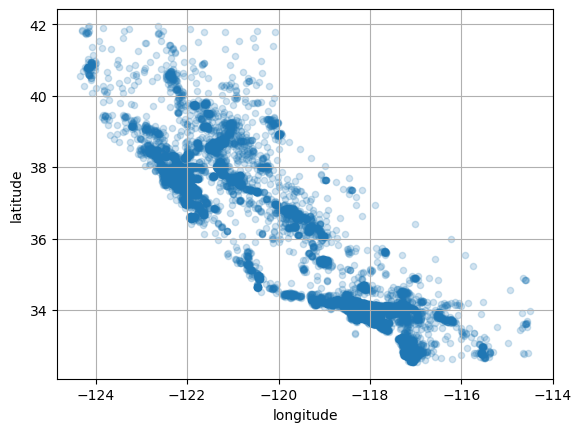

In [112]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

**Mejorando grafico**
- El **radio de cada círculo** representa la población del distrito (opción `s`), y el **color** representa el precio (opción `c`).
Aquí se utiliza un **mapa de colores predefinido** (opción `cmap`) llamado **`jet`**, que va desde el **azul** (valores bajos) hasta el **rojo** (precios altos).

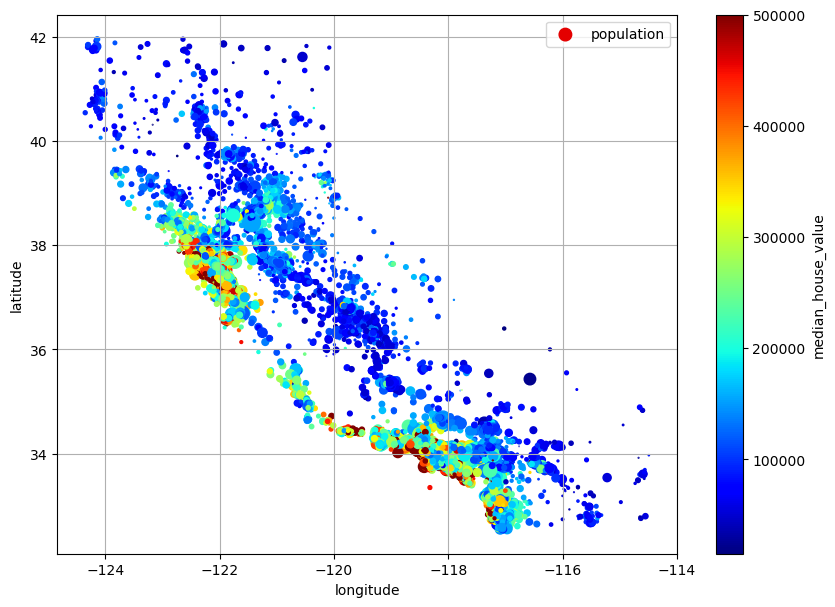

In [113]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,
            s=housing['population']/100, label='population',
            c='median_house_value',cmap='jet',colorbar=True,
            legend=True, sharex=False,figsize=(10,7))
plt.show()

Esta imagen te indica que los **precios de las viviendas están fuertemente relacionados con la ubicación** (por ejemplo, la cercanía al océano) y con la **densidad de población**. Un **algoritmo de clustering** debería ser útil para **detectar el clúster principal** y para **añadir nuevas características** que midan la **proximidad a los centros de los clústeres**.

## Correlaciones

- La correlación de **Pearson**, también llamada coeficiente de correlación producto-momento de Pearson, es una medida estadística que <span style="background-color:yellow"> cuantifica la fuerza y dirección de la <u> **relación lineal**</u> </span> entre dos variables continuas. Su valor varía entre -1 y +1. Un valor de +1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta, y 0 indica ausencia de correlación lineal. 

<img src="Correlacion.jpg" alt="Mapa de correlación" width="50%"/>

**Usamos método `corr()` con argumento `numeric_only=True`**   

In [114]:
corr_matrix=housing.corr(numeric_only=True)

In [115]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


**Correlaciones del target `median_house_value` con las variables**

In [116]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

**Visualización gráfica**  

- Usamos `scatter_matrix`para visualizar.
- Solo los atributos con mayor correlación(4 primeros)

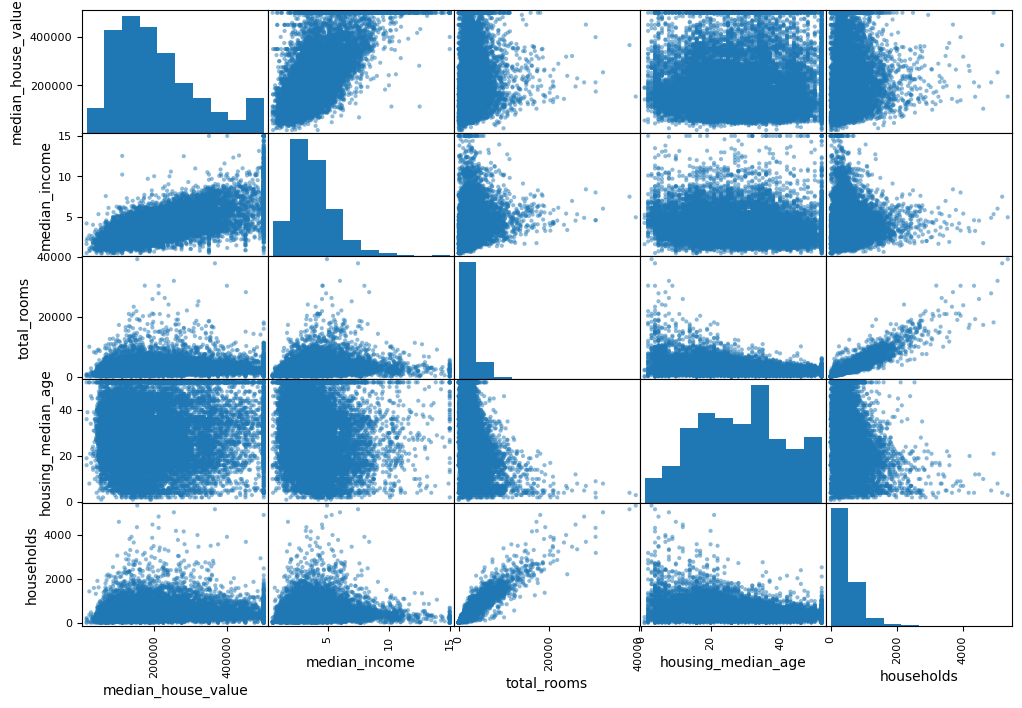

In [117]:
from pandas.plotting import scatter_matrix
atributos=['median_house_value','median_income','total_rooms','housing_median_age','households']
scatter_matrix(housing[atributos],figsize=(12,8))
plt.show()

- De las 4 características la mas **relavante** es "median_income"
   

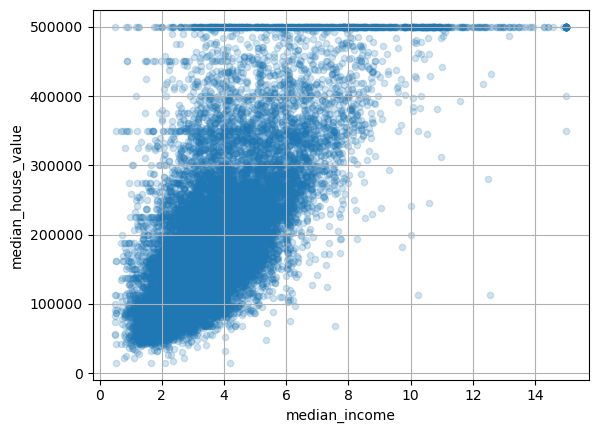

In [118]:
housing.plot(kind="scatter",x='median_income',y='median_house_value',grid=True,alpha=0.2)
plt.show()

Antes de preparar los datos para los algoritmos de aprendizaje automático es **probar varias combinaciones de atributos**. Por ejemplo, el **número total de habitaciones en un distrito** no es muy útil si no sabes cuántos hogares hay. Lo que realmente se necesita es el **número de habitaciones por hogar**. De manera similar, el número total de dormitorios por sí solo **tampoco es muy útil**: probablemente quieras compararlo con el número de habitaciones y la **población por hogar** también parece una combinación de atributos interesante para analizar.  

In [119]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [120]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

El nuevo atributo `bedrooms_ratio` está **mucho más correlacionado con el valor medio de la vivienda** que el número total de habitaciones o dormitorios.  
Aparentemente, las casas con una **menor proporción de dormitorios por habitación** tienden a ser más caras.  

El **número de habitaciones por hogar** también resulta ser más informativo que el número total de habitaciones en un distrito;  
obviamente, **cuanto más grandes son las casas, más caras tienden a ser**.


Volvemos a un **conjunto de entrenamiento limpio** (haciendo una copia de `strat_train_set` nuevamente). **separaramos los predictores y las etiquetas**.  
**Nota:** la función `drop()` crea una **copia** de los datos y **no afecta** a `strat_train_set`.


In [121]:
housing = strat_train_set.drop("median_house_value", axis=1) # La matriz X
housing_labels = strat_train_set["median_house_value"].copy()

# LIMPIEZA DE DATOS

In [122]:
housing.isna().sum()[housing.isna().sum()>0]

total_bedrooms    168
dtype: int64

**Opción 1: Eliminar las filas con valores nulos**
```python
housing.dropna(subset=["total_bedrooms"], inplace=True)
```
**Opción 2: Eliminar la columna entera**
```python
housing.drop("total_bedrooms", axis=1)
```
**Opción 3: Rellenar con la mediana**
```python
mediana = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(mediana, inplace=True)
```

- Se realizará la imputación de datos faltantes con la **Opción 3**, pero mejorada con `SimpleImputer` de la librería sklearn

In [123]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

- Excluyendo a **no muméricos**

In [124]:
housing_num=housing.select_dtypes(exclude="object")

In [125]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [126]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [127]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

- Realizando la imputación

In [128]:
X=imputer.transform(housing_num)

Los valores faltantes también pueden ser reemplazados por el **valor medio** (`strategy="mean"`),  
o por el **valor más frecuente** (`strategy="most_frequent"`),  
o por un **valor constante** (`strategy="constant"`, `fill_value=…`).  

Las **dos últimas estrategias** (`most_frequent` y `constant`) **son compatibles con datos no numéricos**.


In [129]:
X # Es una matriz numpy

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

- Convirtiendo a dataframe

In [130]:
housing_tr=pd.DataFrame(X,columns = housing_num.columns,index=housing_num.index)

In [131]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


**MANEJO DE DATOS CATEGÓRICOS**

In [132]:
housing_cat=housing.select_dtypes(exclude="number")
            # housing_cat=housing[["ocean_proximity"]]           ** Tambien se puede seleccionar la columna por su nombre
            #housing_cat=housing.select_dtypes(include="object") ** Tambien se puede usar select_dtypes(include="object")
housing_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [133]:
housing_cat["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

- Podemos usar la clase `OrdinalEncoder` de Scikit-Learn:

```python
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
```
- **Problemas con la codificación ordinal**  
El problema con esta representación es que los algoritmos de ML asumirán que dos valores cercanos son más similares que dos valores distantes.
Esto puede estar bien en algunos casos (como categorías ordenadas: "malo", "regular", "bueno", "excelente"),
pero no es el caso de la columna ocean_proximity.
Por ejemplo, las categorías 0 e 4 pueden ser más similares entre sí que las categorías 0 y 1, aunque estén numeradas de forma continua.

- Usamos **codificación one-hot**, porque solo una de las variables estará activa <span style="background-color:yellow"> activa (1, "hot")</span> y las demás estarán en <span style="background-color:yellow"> 0 ("cold")</span>.
Estas nuevas variables a veces se llaman atributos ficticios (dummy attributes). Scikit-Learn proporciona la clase `OneHotEncoder` para convertir valores categóricos en vectores one-hot.

In [134]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [135]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [136]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

# ESCALADO Y TRANSFORMACIÓN

> ⚠️ **ADVERTENCIA**  
Al igual que con todos los estimadores, es **importante ajustar los escaladores (`scalers`) solo con los datos de entrenamiento**:  
**nunca uses `fit()` o `fit_transform()` con ningún conjunto que no sea el conjunto de entrenamiento**.

Una vez que tienes un escalador entrenado, puedes usarlo con `transform()` en cualquier otro conjunto:  
incluyendo el conjunto de validación, el conjunto de prueba y nuevos datos.

Ten en cuenta que, aunque los valores del conjunto de entrenamiento siempre se escalarán al rango especificado,  
si los **nuevos datos contienen valores atípicos (outliers)**, estos pueden terminar escalados **fuera del rango**.

Si deseas evitar esto, simplemente establece el hiperparámetro `clip=True`.


<u>**Escalado Min-Max (Normalización)**</u>

El **escalado Min-Max** (también conocido como *normalización*) es el más simple:  
para cada atributo, los valores se **desplazan y reescalan** para que estén dentro del rango de 0 a 1.  

Esto se logra restando el valor mínimo y dividiendo por la diferencia entre el valor máximo y el mínimo.

Scikit-Learn ofrece un transformador llamado `MinMaxScaler` para realizar esta operación.  
Tiene un hiperparámetro llamado `feature_range` que permite cambiar el rango de salida si, por alguna razón, no deseas el estándar [0, 1].  

Por ejemplo, **las redes neuronales suelen funcionar mejor con entradas centradas en cero**, por lo que un rango de –1 a 1 puede ser preferible.

Usarlo es bastante sencillo.


In [137]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

In [138]:
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

<u>**Estandarización**</u>

La **estandarización** es diferente: primero **resta la media** (de modo que los valores estandarizados tengan una media cero),  
luego **divide el resultado entre la desviación estándar** (por lo que los valores estandarizados tendrán una desviación estándar igual a 1).

A diferencia del escalado Min-Max, la estandarización **no limita los valores a un rango específico**.  
Sin embargo, la estandarización es **mucho menos sensible a los valores atípicos (outliers)**.

Por ejemplo, supongamos que un distrito tiene un ingreso medio igual a 100 (por error), en lugar del rango habitual de 0 a 15.  
El escalado Min-Max al rango 0–1 asignaría ese valor atípico a 1, y **aplastaría todos los demás valores** hacia el rango 0–0.15.  
En cambio, la estandarización **no se vería tan afectada** por ese valor extremo.

Scikit-Learn proporciona un transformador llamado `StandardScaler` para aplicar estandarización.


In [139]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)

In [140]:
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

**COLAS PESADAS**

In [141]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

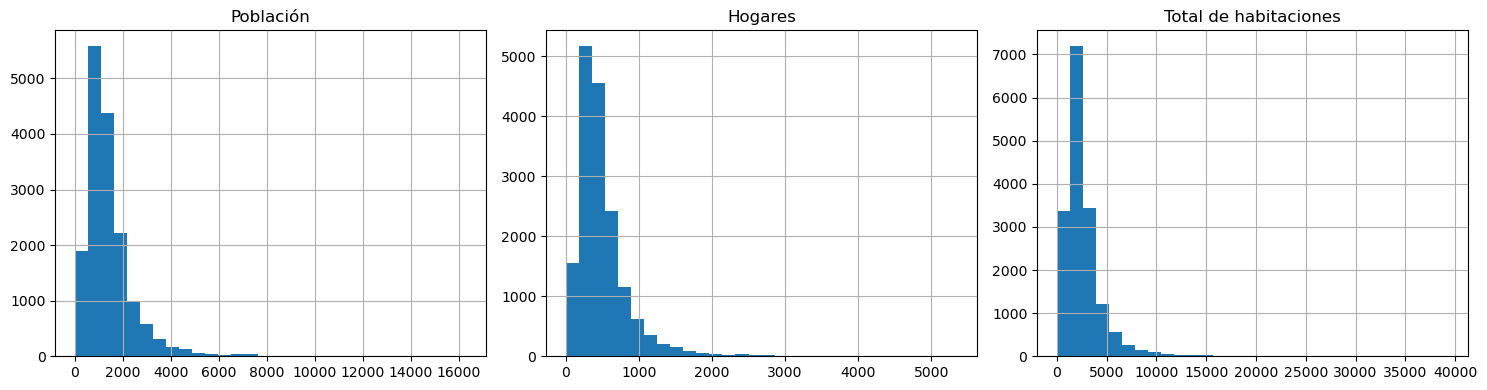

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnas

housing["population"].hist(bins=30, ax=axes[0])
axes[0].set_title("Población")

housing["households"].hist(bins=30, ax=axes[1])
axes[1].set_title("Hogares")

housing["total_rooms"].hist(bins=30, ax=axes[2])
axes[2].set_title("Total de habitaciones")

plt.tight_layout()
plt.show()

- Transformamos a forma logarítmica.

In [143]:
Poblog=housing["population"].apply(np.log)
Hoglog=housing["households"].apply(np.log)
Hablog=housing["total_rooms"].apply(np.log)

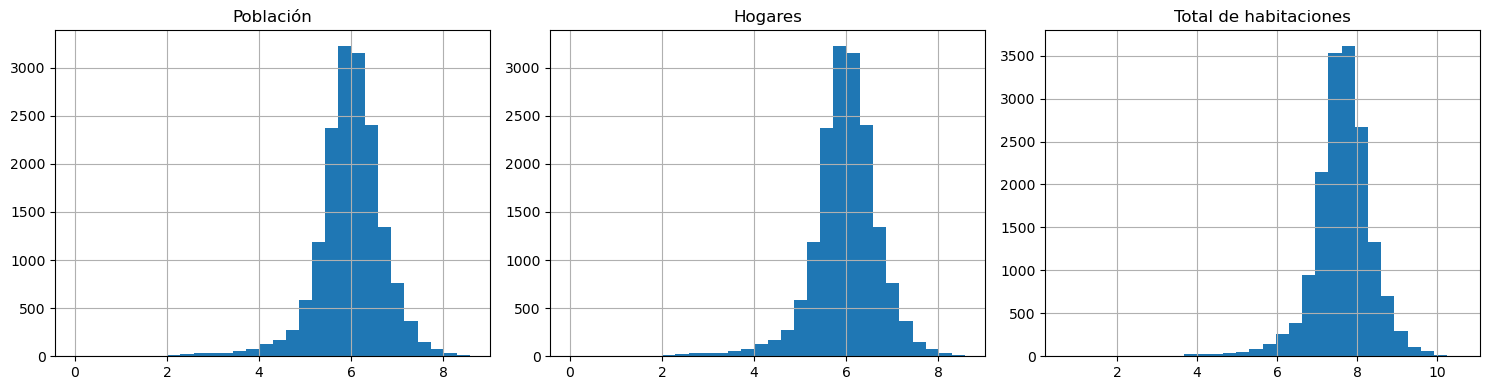

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnas

Hoglog.hist(bins=30, ax=axes[0])
axes[0].set_title("Población")

Hoglog.hist(bins=30, ax=axes[1])
axes[1].set_title("Hogares")

Hablog.hist(bins=30, ax=axes[2])
axes[2].set_title("Total de habitaciones")

plt.tight_layout()
plt.show()

**Distribuciones multimodales**

<Axes: >

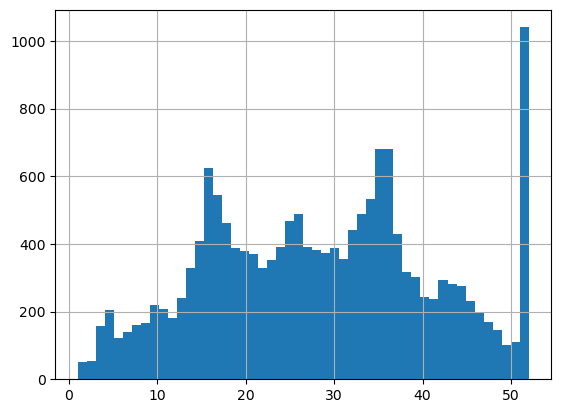

In [145]:
housing["housing_median_age"].hist(bins=50)

- Usamos una nueva característica basada en RBF gausiano al rededor de 35

In [146]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35=rbf_kernel(housing[["housing_median_age"]],[[35]],gamma=0.1)

In [147]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

- Gráfico para gamma 0.1 y 0.03

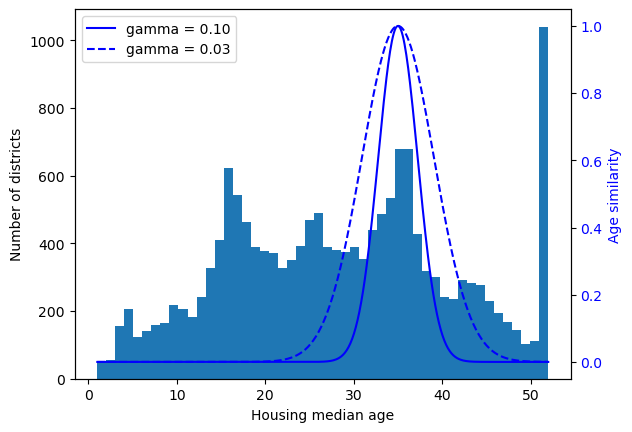

In [148]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

**INVERSA DE LAS TRANSFOMACIONES**

- Usando `inverse_transform`

In [149]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [150]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

- Usando `TransformedTargetRegressor`

In [151]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [152]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

**TRANSFORMACION PERSONALIZADA**  usando `FunctionTransformer`

In [153]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [154]:
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


- Un **transformador personalizado** puede (y con frecuencia lo hace) utilizar otros **estimadores** en su implementación.  
Por ejemplo, el siguiente código muestra un transformador personalizado que utiliza un **agrupador KMeans** dentro del método `fit()` para identificar los principales clústeres en los datos de entrenamiento, y luego usa la función `rbf_kernel()` en el método `transform()` para **medir la similitud de cada muestra con respecto a cada centroide de clúster**.


In [155]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator,TransformerMixin
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

- Este código crea un transformador llamado `ClusterSimilarity`, estableciendo el número de clústeres en 10, luego, llama a `fit_transform()` utilizando la **latitud y longitud** de cada distrito en el conjunto de entrenamiento, ponderando cada distrito por su **valor medio de vivienda** (`median_house_value`).
El transformador utiliza **k-means** para localizar los centros de los clústeres, y luego mide la **similitud gaussiana (RBF)** entre cada distrito y los 10 centros de clúster. El resultado es una **matriz** con una **fila por distrito** y una **columna por clúster**.  

In [156]:
cluster_simil=ClusterSimilarity(n_clusters=10,gamma=1,random_state=42)
similarities=cluster_simil.fit_transform(housing[["latitude","longitude"]],sample_weight=housing_labels)

In [157]:
similarities[:3].round(2) # las 3 primeras filas cpn 2 decimales

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

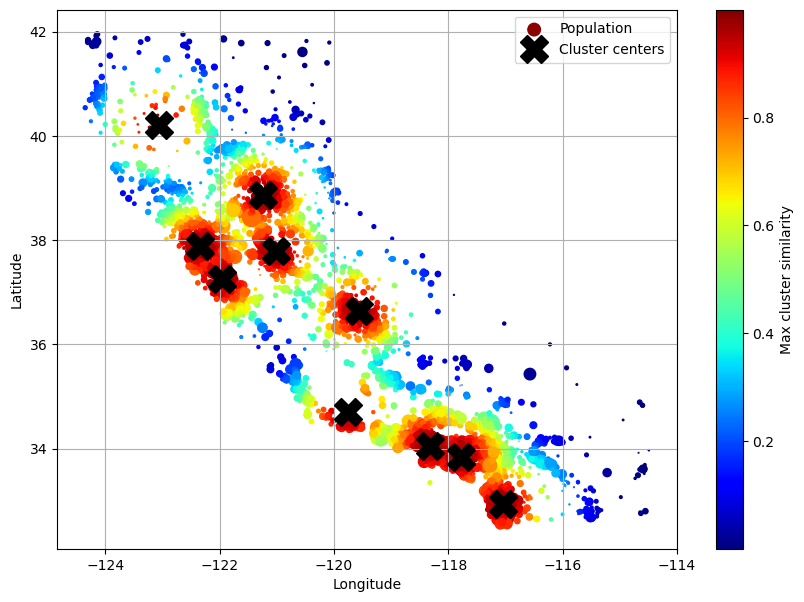

In [158]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

Se muestran los **10 centros de clúster encontrados por K-Means**. Los distritos están **coloreados según su similitud geográfica** con el centro de clúster más cercano, la mayoría de los clústeres se encuentran en zonas **altamente pobladas y costosas**.


# USANDO PIPELINE

In [159]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [160]:
import sklearn
sklearn.set_config(display="diagram")

In [161]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [162]:
housing_num_prepared=num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [163]:
housing_num_std_scaled[:2].round(2) # sin pipeline

array([[-1.42,  1.01,  1.86,  0.31,  1.36,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

Si deseasamos **recuperar un DataFrame con nombres de columnas legibles**, puedemos usar el método `get_feature_names_out()` del pipeline.

In [164]:
housing_prepared_fr = pd.DataFrame(
    housing_num_prepared,
    columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)
housing_prepared_fr.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


**Aplicando las columnas numéricas y categóricas**

In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [166]:
housing_prepared=preprocessing.fit_transform(housing)

### Pipeline de preprocesamiento completo

Contamos con un **pipeline de preprocesamiento** que toma todo el conjunto de entrenamiento y aplica cada transformador a las columnas correspondientes, para luego **concatenar las columnas transformadas horizontalmente**.  

Es importante recordar que los transformadores **nunca deben cambiar el número de filas**. Una vez más, esto devuelve un **array de NumPy**, pero puedes obtener los **nombres de las columnas** usando el método `preprocessing.get_feature_names_out()` y envolver los datos resultantes en un **DataFrame bien estructurado**, como hicimos anteriormente.


In [167]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

Un único pipeline que realice <span style="background-color:yellow">**todas las transformaciones**</span> con las que has estado experimentando hasta ahora.  
Repasemos lo que hará este pipeline y por qué:

- Los **valores faltantes en las características numéricas** serán imputados reemplazándolos con la **mediana**,  
  ya que la mayoría de los algoritmos de *machine learning* no aceptan valores ausentes.  
  En las características categóricas, los valores faltantes serán reemplazados por la **categoría más frecuente**.

- La **característica categórica** será codificada con **one-hot encoding**,  
  ya que la mayoría de los modelos solo aceptan **entradas numéricas**.

- Se calcularán y agregarán algunas **características de razón**:  
  `bedrooms_ratio`, `rooms_per_house`, y `people_per_house`.  
  Esperamos que estas correlacionen mejor con el **valor medio de la vivienda** y así ayuden a los modelos.

- También se agregarán algunas **características de similitud con clústeres**.  
  Es probable que sean más útiles para el modelo que simplemente usar latitud y longitud.

- Las **características con una cola larga** serán reemplazadas por su **logaritmo**,  
  ya que muchos modelos prefieren características con distribuciones **más uniformes o gaussianas**.

- Finalmente, **todas las características numéricas serán estandarizadas**,  
  ya que la mayoría de los algoritmos prefieren que todas las características estén en la **misma escala**.


In [168]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

- Este `ColumnTransformer` realiza todas las transformaciones.

In [169]:
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [170]:
housing_prepared=preprocessing.fit_transform(housing)

In [171]:
housing_prepared.shape

(16512, 24)

In [172]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [173]:
housing_prepared

array([[ 1.84662439, -0.86602737, -0.33020372, ...,  1.        ,
         0.        ,  1.86111875],
       [-0.5081207 ,  0.0245495 , -0.25361631, ...,  0.        ,
         0.        ,  0.90762971],
       [-0.20215476, -0.04119332, -0.05104091, ...,  0.        ,
         0.        ,  0.35142777],
       ...,
       [-0.24249175, -0.10998748,  0.15854151, ...,  0.        ,
         1.        , -1.23772062],
       [ 0.25977479, -0.36093745, -0.21033248, ...,  0.        ,
         0.        ,  0.66925745],
       [ 3.61270996, -1.32397227,  0.04958379, ...,  0.        ,
         1.        ,  1.22545939]])

# SELECCIÓN DEL MODELO

## PRIMERA APROXIMACIÓN  `LinearRegression`

In [175]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ACBF040B60>)])),
                ('linearregression', LinearRegression())])

In [176]:
housing_predictions=lin_reg.predict(housing)

**Las predicciones**

In [177]:
housing_predictions[:5].round(2) 

array([242761.81, 375862.79, 127480.98,  99355.3 , 324610.74])

In [178]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [179]:
dif=housing_predictions[:5].round(2) - housing_labels.iloc[:5].values

In [180]:
dif ## Desviaciones

array([-215538.19, -107937.21,   25780.98,    3255.3 ,  -37189.26])

**Métrica RECM**

In [182]:
from sklearn.metrics import mean_absolute_error
lin_rmse=mean_absolute_error(housing_labels,housing_predictions)
lin_rmse

50899.597369196614

**Modelo <span style="background-color:yellow">SUBAJUSTADO</span>**

## SEGUNDA APROXIMACIÓN `DecisionTreeClassifier`

In [183]:
from sklearn.tree import DecisionTreeClassifier
tree_reg=make_pipeline(preprocessing,DecisionTreeClassifier(random_state=42))
tree_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ACBF040B60>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

**Métrica RECM**

In [184]:
housing_predictions=tree_reg.predict(housing)
tree_rmse=mean_absolute_error(housing_labels,housing_predictions)
tree_rmse

0.0

**Modelo <span style="background-color:yellow">SOBREAJUSTADO</span>** Aparente

- Vamos a realizar la métrica con validación cruzada

In [187]:
from sklearn.model_selection import cross_val_score
tree_rmses=-cross_val_score(tree_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)
pd.Series(tree_rmses).describe()

C:\Users\shica\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


count       10.000000
mean     76956.226088
std       2814.194672
min      73221.047164
25%      74820.409825
50%      77316.610479
75%      78241.788794
max      82486.658128
dtype: float64

- Rendimiento real **RECM 76956.22**

## TERCERA APROXIMACIÓN `RandomForestRegressor`

In [189]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ACBF040B60>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [190]:
forest_rmses=-cross_val_score(forest_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)

In [191]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47002.931706
std       1048.451340
min      45667.064036
25%      46494.358345
50%      47093.173938
75%      47274.873814
max      49354.705514
dtype: float64

- Rendimiento **RECM 47002.93**

# PERFECCIONANDO MODELO 

## Búsqueda exhaustiva `GridSearchCV`

In [192]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001ACBF040B60>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

**Encontramos los mejores hiperparámetros**

In [193]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [194]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001A...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ACC7C82A50>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

Los puntajes de evaluación están disponibles usando `grid_search.cv_results_`.  
Este es un **diccionario**, pero si lo envuelves en un **DataFrame** obtendrás una lista ordenada con:

- Todos los puntajes de prueba (*test scores*) para cada combinación de hiperparámetros.
- Los resultados de cada división de validación cruzada (*cross-validation split*).
- El puntaje medio de prueba (*mean test score*) a través de todas las divisiones.


In [195]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43536,43753,44569,43953
13,15,8,44084,44205,44863,44384
14,15,10,44368,44496,45200,44688
7,10,6,44251,44628,45857,44912
9,10,6,44251,44628,45857,44912


### Búsqueda aleatoria de hiperparámetros con `RandomizedSearchCV`

El enfoque de **búsqueda en cuadrícula** (*grid search*) está bien cuando exploras relativamente pocas combinaciones,  
como en el ejemplo anterior, pero **`RandomizedSearchCV`** suele ser preferible,  
especialmente cuando el espacio de búsqueda de hiperparámetros es **grande**.

Esta clase se usa de forma muy similar a `GridSearchCV`,  
pero en lugar de probar **todas las combinaciones posibles**,  
evalúa un **número fijo de combinaciones**, seleccionando **un valor aleatorio** para cada hiperparámetro en cada iteración.

---

#### Beneficios de la búsqueda aleatoria:

- **Exploración más amplia de valores**  
  Si algunos hiperparámetros son continuos (o discretos con muchos valores posibles)  
  y ejecutas la búsqueda aleatoria, por ejemplo, durante 1,000 iteraciones,  
  se explorarán **1,000 valores distintos** para cada uno de esos hiperparámetros,  
  mientras que la búsqueda en cuadrícula solo exploraría los valores listados manualmente.

- **Eficiencia si un hiperparámetro no es relevante**  
  Si un hiperparámetro tiene 10 posibles valores pero realmente no influye mucho,  
  en *grid search* esto multiplicará el tiempo de entrenamiento por 10.  
  En *random search* no afecta de la misma manera.

- **Control del número de iteraciones**  
  Si hay 6 hiperparámetros, cada uno con 10 valores posibles,  
  la búsqueda en cuadrícula requeriría **1 millón de entrenamientos**.  
  Con *random search* puedes elegir **el número de iteraciones** que quieras.

---

#### Cómo definir los hiperparámetros:
Para cada hiperparámetro puedes proporcionar:
- Una **lista de posibles valores**.
- Una **distribución de probabilidad** desde la cual se muestrearán los valores.


In [196]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [197]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001ACC7BE8D10>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001ACC7C82600>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [198]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41014,42151,42695,41953
8,32,7,41604,42200,43219,42341
0,41,16,42106,42743,43443,42764
5,42,4,41835,42925,43557,42772
2,23,8,42421,43094,43856,43124


### Como elegir la distribución de muestreo para un hiperparámetro

- `scipy.stats.randint(a, b+1)`: para hiperparámetros con valores **discretos** que van de *a* a *b*,  
  y todos los valores en ese rango son igualmente probables.

- `scipy.stats.uniform(a, b)`: muy similar al anterior, pero para hiperparámetros **continuos**.

- `scipy.stats.geom(1 / scale)`: para valores discretos, cuando quieres muestrear aproximadamente en una **escala dada**.  
  Por ejemplo, con `scale=1000`, la mayoría de los valores estarán alrededor de 1000,  
  pero aproximadamente el **10%** de las muestras serán menores a 100 y otro **10%** serán mayores a 2300.

- `scipy.stats.expon(scale)`: equivalente **continuo** de `geom`.  
  Solo tienes que definir `scale` como el valor más probable.

- `scipy.stats.loguniform(a, b)`: útil cuando **no tienes idea de la escala óptima** del hiperparámetro.  
  Por ejemplo, si defines `a=0.01` y `b=100`, será **igual de probable** obtener un valor entre 0.01 y 0.1 que entre 10 y 100.


## ANALIZANDO LOS MEJORES MODELOS Y SUS ERRORES

In [199]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

- Ordenando por importancia

In [200]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.1898423270105783, 'log__median_income'),
 (0.07709175866873944, 'cat__ocean_proximity_INLAND'),
 (0.06455488601956336, 'bedrooms__ratio'),
 (0.056936146643377976, 'rooms_per_house__ratio'),
 (0.0490294770805355, 'people_per_house__ratio'),
 (0.03807069074492323, 'geo__Cluster 3 similarity'),
 (0.025643913400094472, 'geo__Cluster 22 similarity'),
 (0.02179127543243723, 'geo__Cluster 17 similarity'),
 (0.021575251507503695, 'geo__Cluster 6 similarity'),
 (0.017868654556924362, 'geo__Cluster 2 similarity'),
 (0.017431400050755975, 'geo__Cluster 32 similarity'),
 (0.015981159400591683, 'geo__Cluster 18 similarity'),
 (0.014888464257396877, 'geo__Cluster 40 similarity'),
 (0.014488389218107146, 'geo__Cluster 43 similarity'),
 (0.014252940099964142, 'geo__Cluster 7 similarity'),
 (0.014038173319370725, 'geo__Cluster 21 similarity'),
 (0.013846025114732161, 'geo__Cluster 38 similarity'),
 (0.013625709964722737, 'geo__Cluster 34 similarity'),
 (0.013547297167034428, 'geo__Cluster 41 simila

Con esta información, podrías intentar eliminar algunas de las características menos útiles.  
Por ejemplo, aparentemente **solo una categoría de `ocean_proximity`** es realmente útil,  
así que podrías intentar **eliminar las demás**.


## Evaluar el sistema en el conjunto de prueba

⚠️ **Advertencia**  
En las versiones recientes de **Scikit-Learn**, debes usar  
`root_mean_squared_error(labels, predictions)` para calcular el **RMSE**,  
en lugar de `mean_squared_error(labels, predictions, squared=False)`.

El siguiente bloque `try/except` intenta importar `root_mean_squared_error`,  
y si falla, simplemente lo define manualmente.


In [204]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

In [205]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

41549.20158097943


En algunos casos, una **estimación puntual** del error de generalización no será suficiente para convencerte de poner el modelo en producción:  
¿qué pasa si solo es un **0,1% mejor** que el modelo que ya está en producción?  

In [206]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval


In [208]:
rmse_lower.round(2), rmse_upper.round(2)

(39579.44, 43805.03)

Podrías querer tener una idea de **qué tan precisa es esta estimación**.  
Para esto, puedes calcular un **intervalo de confianza del 95%** para el error de generalización usando `scipy.stats.t.interval()`.

En este ejemplo, se obtiene un intervalo relativamente amplio: de **39,579.44 a 43,805.03**,  
y la estimación puntual anterior de **41,549.20** se encuentra aproximadamente en el centro de este intervalo.


## LANZAR, MONITORIZAR Y MANTENER EL SISTEMA

### Persistencia de modelos con `joblib`

La **persistencia de modelos** consiste en **guardar un modelo entrenado** para poder cargarlo y usarlo posteriormente,  
sin tener que volver a entrenarlo.


In [209]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

### Despliegue del modelo a producción

Ahora puedes desplegar este modelo en producción.  
Por ejemplo, el siguiente código podría ser un script que se ejecute en un entorno de producción:


In [210]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [214]:
predictions

array([439808.14, 455211.06, 109492.  ,  98208.  , 340021.04])

Podrías usar `pickle` en su lugar, pero **`joblib` es más eficiente**.

Esto se debe a que `joblib` está optimizado para manejar objetos grandes,  
como modelos de *machine learning* y arreglos de NumPy,  
lo que lo hace más rápido y eficiente que `pickle` en estos casos.
